In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams

In [2]:
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [4]:
skt = pd.read_csv('./data/SKT.csv')
google = pd.read_csv('./data/GOOG.csv')
apple = pd.read_csv('./data/AAPL.csv')

In [5]:
def get_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index("Date", inplace=True)
    ts = df['Close']
    return ts

In [6]:
skt_ts = get_time(skt)
google_ts = get_time(google)
apple_ts = get_time(apple)

In [7]:
def log_scale(ts):
    ts = ts.interpolate(method='time')
    ts[ts.isna()]
    ts_log = np.log(ts)
    return ts_log

In [8]:
skt_ts = log_scale(skt_ts)
google_ts = log_scale(google_ts)
apple_ts = log_scale(apple_ts)

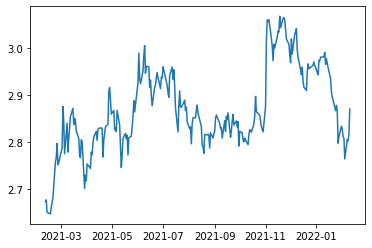

In [9]:
plt.plot(skt_ts)
plt.show()

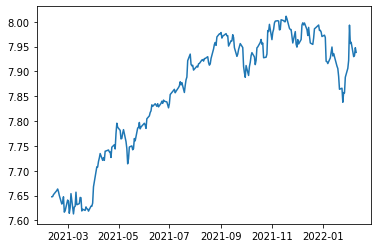

In [10]:
plt.plot(google_ts)
plt.show()

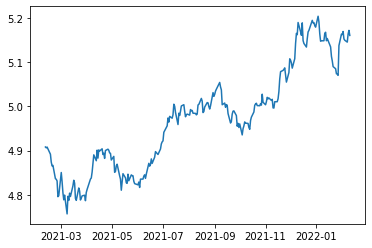

In [11]:
plt.plot(apple_ts)
plt.show()

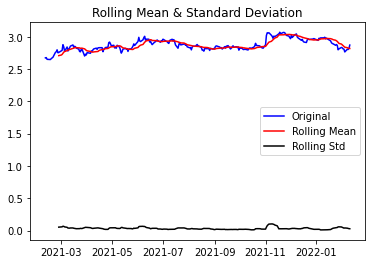

Results of Dickey-Fuller Test:
Test Statistic                  -3.220247
p-value                          0.018842
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


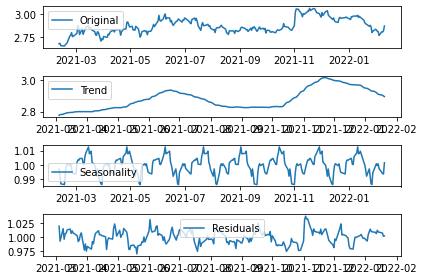

In [13]:
# 정성적 그래프 분석
plot_rolling_statistics(skt_ts, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(skt_ts)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(skt_ts, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(skt_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

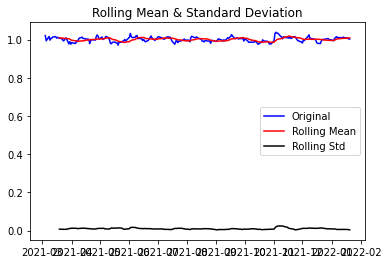

Results of Dickey-Fuller Test:
Test Statistic                -6.101802e+00
p-value                        9.795037e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.230000e+02
Critical Value (1%)           -3.460019e+00
Critical Value (5%)           -2.874590e+00
Critical Value (10%)          -2.573725e+00
dtype: float64


In [14]:
# Residual 안정성 확인
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

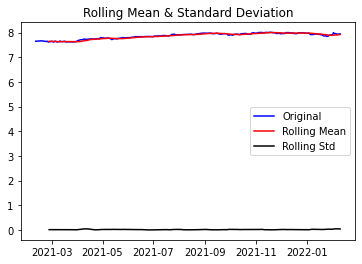

Results of Dickey-Fuller Test:
Test Statistic                  -1.656703
p-value                          0.453547
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


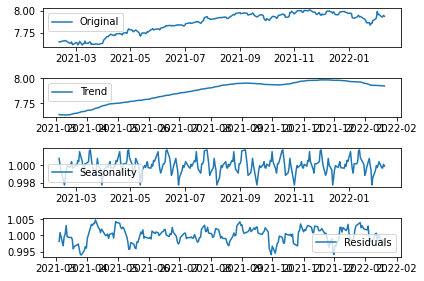

In [23]:
# 정성적 그래프 분석
plot_rolling_statistics(google_ts, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(google_ts)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(google_ts, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(google_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

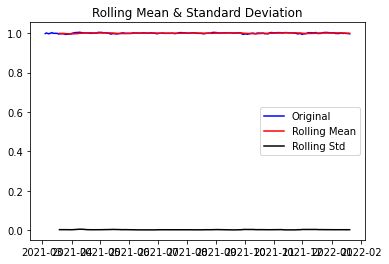

Results of Dickey-Fuller Test:
Test Statistic                  -5.498685
p-value                          0.000002
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


In [24]:
# Residual 안정성 확인
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

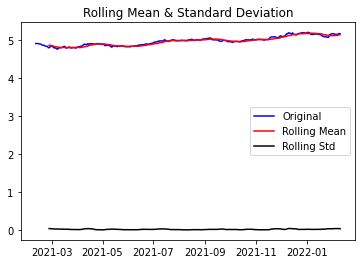

Results of Dickey-Fuller Test:
Test Statistic                  -0.495803
p-value                          0.892833
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


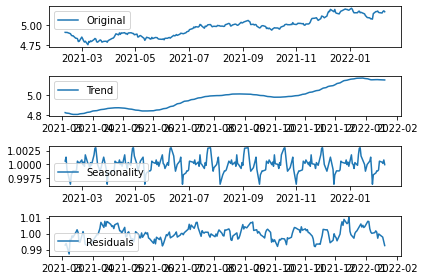

In [25]:
# 정성적 그래프 분석
plot_rolling_statistics(apple_ts, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(apple_ts)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple_ts, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(apple_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

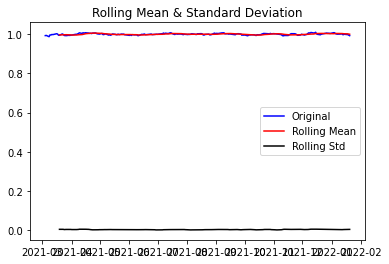

Results of Dickey-Fuller Test:
Test Statistic                  -5.228111
p-value                          0.000008
#Lags Used                       0.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


In [26]:
# Residual 안정성 확인
plot_rolling_statistics(residual)

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

## Train/Test Split

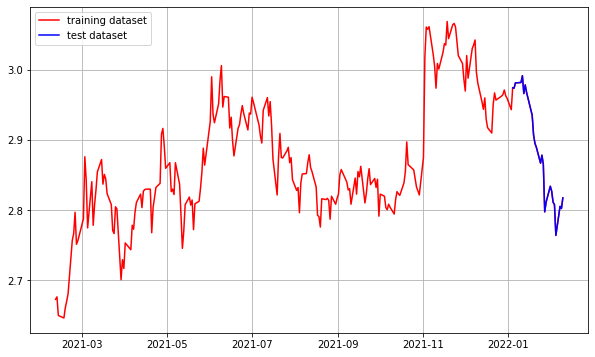

In [15]:
skt_ts = skt_ts[:int(len(skt_ts)*0.999)]
train_data, test_data = skt_ts[:int(len(skt_ts)*0.9)], skt_ts[int(len(skt_ts)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(skt_ts, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## Parameter Select

- p+q < 2
- p*q = 0

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


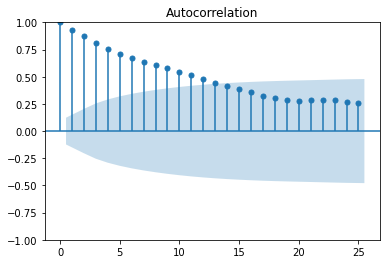

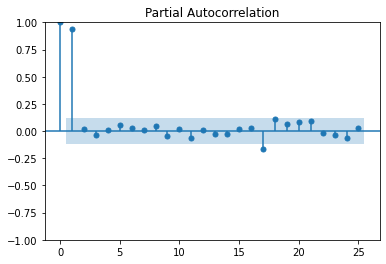

In [16]:
# ACF, PACF 그려보기 -> p,q 구하기

plot_acf(skt_ts)
plot_pacf(skt_ts)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.679735e+01
p-value                        1.228188e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


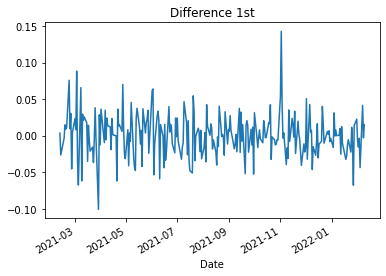

In [17]:
# 차분 안정성 확인 -> d 구하기
diff_1 = skt_ts.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

- p=1, q=0, d=1 을 파라미터로 사용

## Modeling

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Build and Train  Model
# p, d, q
model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 472.679
Date:                Wed, 16 Feb 2022   AIC                           -941.358
Time:                        02:38:43   BIC                           -934.517
Sample:                             0   HQIC                          -938.597
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0601      0.058     -1.044      0.296      -0.173       0.053
sigma2         0.0009   6.12e-05     14.576      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

## Test, Plotting

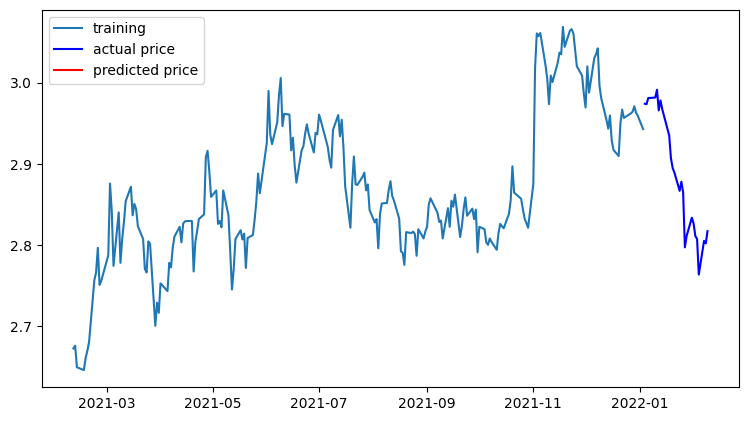

In [19]:
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data.values))/np.abs(np.exp(test_data.values)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2.728114068116197
MAE:  1.4137894742954076
RMSE:  1.6517003566374249
MAPE: 8.22%


## Google

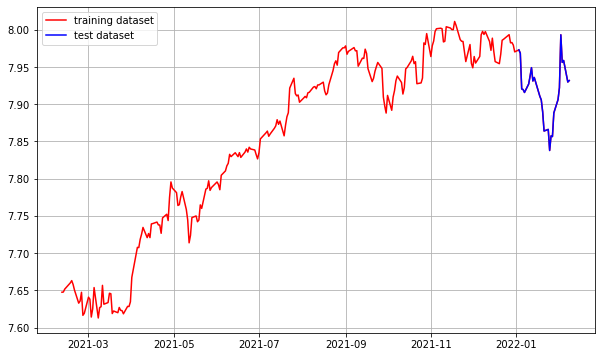

In [28]:
google_ts = google_ts[:int(len(google_ts)*0.999)]
train_data, test_data = google_ts[:int(len(google_ts)*0.9)], google_ts[int(len(google_ts)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(google_ts, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

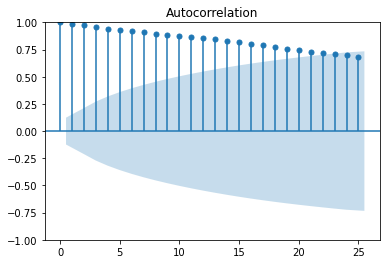

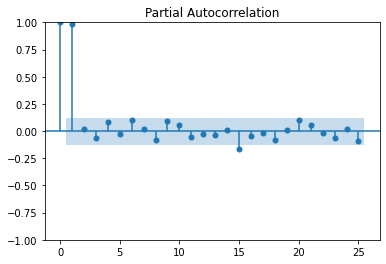

In [29]:
# ACF, PACF 그려보기 -> p,q 구하기

plot_acf(google_ts)
plot_pacf(google_ts)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -9.702134e+00
p-value                        1.065245e-16
#Lags Used                     2.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


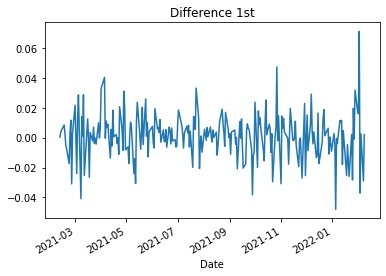

In [30]:
# 차분 안정성 확인 -> d 구하기
diff_1 = google_ts.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Build and Train  Model
# p, d, q
model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 649.102
Date:                Wed, 16 Feb 2022   AIC                          -1294.203
Time:                        02:42:55   BIC                          -1287.371
Sample:                             0   HQIC                         -1291.446
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0243      0.061     -0.397      0.692      -0.145       0.096
sigma2         0.0002   1.41e-05     12.963      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.04   Jarque-

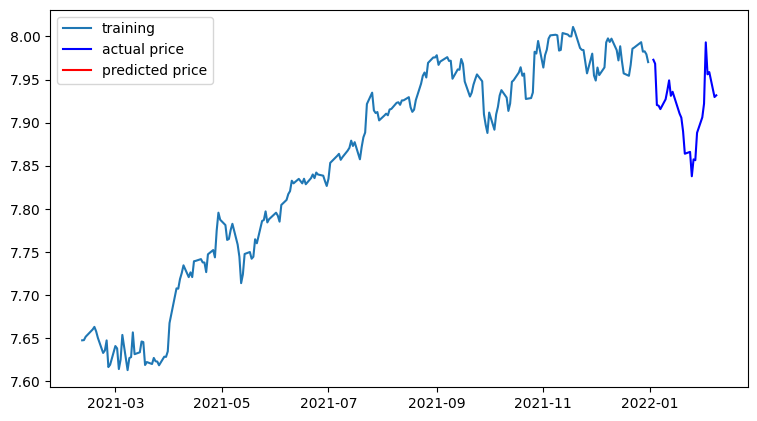

In [32]:
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data.values))/np.abs(np.exp(test_data.values)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  32746.38955075242
MAE:  153.28623001230676
RMSE:  180.95963514207367
MAPE: 5.72%


## Apple

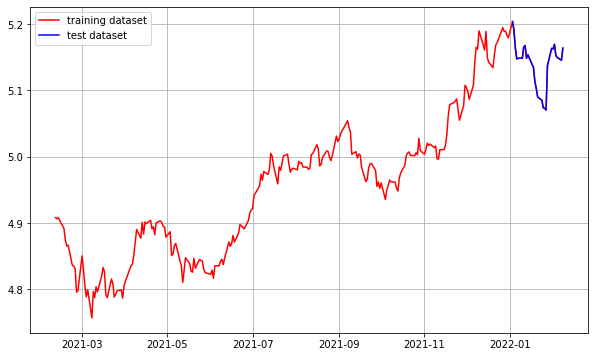

In [35]:
apple_ts = apple_ts[:int(len(apple_ts)*0.999)]
train_data, test_data = apple_ts[:int(len(apple_ts)*0.9)], apple_ts[int(len(apple_ts)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(apple_ts, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

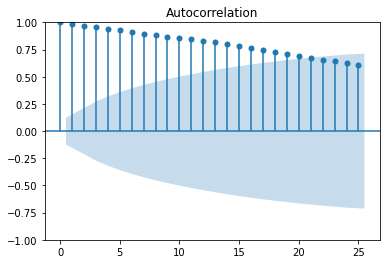

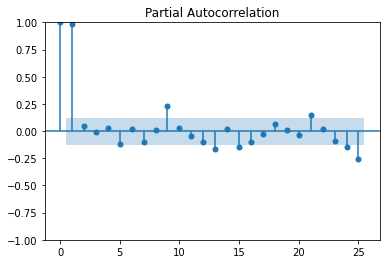

In [36]:
# ACF, PACF 그려보기 -> p,q 구하기

plot_acf(apple_ts)
plot_pacf(apple_ts)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -9.960301e+00
p-value                        2.383399e-17
#Lags Used                     2.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


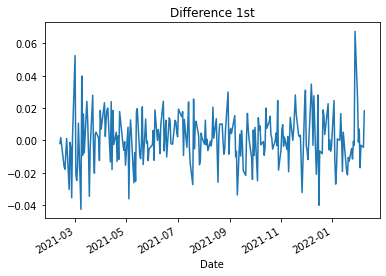

In [37]:
# 차분 안정성 확인 -> d 구하기
diff_1 = apple_ts.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Build and Train  Model
# p, d, q
model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 624.385
Date:                Wed, 16 Feb 2022   AIC                          -1244.770
Time:                        02:44:40   BIC                          -1237.937
Sample:                             0   HQIC                         -1242.012
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0646      0.064     -1.013      0.311      -0.190       0.060
sigma2         0.0002   1.95e-05     11.698      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

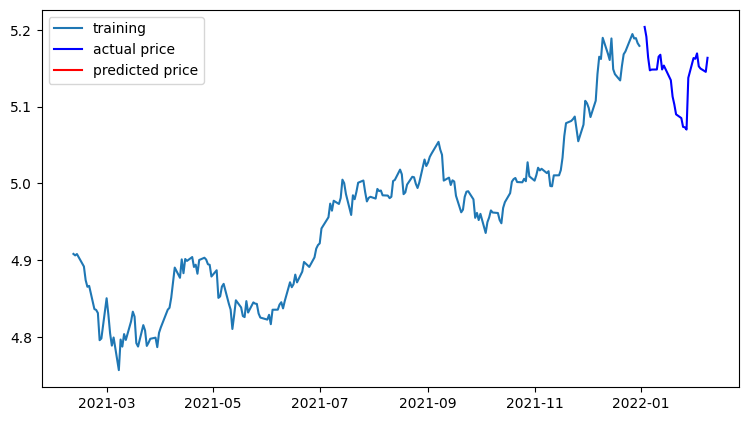

In [39]:
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data.values))/np.abs(np.exp(test_data.values)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  83.58494162357024
MAE:  7.359130065748081
RMSE:  9.142480058691419
MAPE: 4.43%
